In [1]:
import lcdtreespace as lcd

In [2]:
import pandas as pd
import numpy as np
from importlib.resources import files
import os
import matplotlib.pyplot as plt

# Case 1

In [3]:
## data
np.sort(os.listdir(files("lcdtreespace.data").joinpath("case1")))

array(['testcase_1000_0_X.npy', 'testcase_1000_0_ort.npy',
       'testcase_1000_1_X.npy', 'testcase_1000_1_ort.npy',
       'testcase_1000_2_X.npy', 'testcase_1000_2_ort.npy',
       'testcase_1000_3_X.npy', 'testcase_1000_3_ort.npy',
       'testcase_1000_4_X.npy', 'testcase_1000_4_ort.npy',
       'testcase_1000_5_X.npy', 'testcase_1000_5_ort.npy',
       'testcase_1000_6_X.npy', 'testcase_1000_6_ort.npy',
       'testcase_1000_7_X.npy', 'testcase_1000_7_ort.npy',
       'testcase_1000_8_X.npy', 'testcase_1000_8_ort.npy',
       'testcase_1000_9_X.npy', 'testcase_1000_9_ort.npy',
       'testcase_100_0_X.npy', 'testcase_100_0_ort.npy',
       'testcase_100_1_X.npy', 'testcase_100_1_ort.npy',
       'testcase_100_2_X.npy', 'testcase_100_2_ort.npy',
       'testcase_100_3_X.npy', 'testcase_100_3_ort.npy',
       'testcase_100_4_X.npy', 'testcase_100_4_ort.npy',
       'testcase_100_5_X.npy', 'testcase_100_5_ort.npy',
       'testcase_100_6_X.npy', 'testcase_100_6_ort.npy',
       'tes

Here, we compute the log-concave mle with "testcase_100_0"

In [42]:
x = np.load(files("lcdtreespace.data").joinpath("case1").joinpath("testcase_200_0_x.npy"))
ort = np.load(files("lcdtreespace.data").joinpath("case1").joinpath("testcase_200_0_ort.npy"))
x, ort
# x contains coordinates, while ort contains the orthant each point belongs to

(array([0.04195692, 0.07185676, 0.07485287, 0.1015361 , 0.10716075,
        0.11081239, 0.12492295, 0.16827274, 0.1824863 , 0.19280693,
        0.19516114, 0.29847681, 0.35013732, 0.35182295, 0.36514085,
        0.37876418, 0.38285669, 0.43377752, 0.47777892, 0.4834801 ,
        0.51300183, 0.53602476, 0.53731471, 0.56619384, 0.56683272,
        0.58245485, 0.59083689, 0.60028671, 0.60483872, 0.60850073,
        0.61024123, 0.6134176 , 0.63996081, 0.65977716, 0.667791  ,
        0.68410271, 0.69881883, 0.70592402, 0.77147078, 0.80374905,
        0.86181359, 0.8641933 , 0.86829509, 0.884821  , 0.90449915,
        0.93145653, 0.94289404, 0.9945869 , 0.99877817, 0.99990908,
        1.00184565, 1.00435549, 1.00502889, 1.01099786, 1.01702011,
        1.02172961, 1.0223421 , 1.02545426, 1.03720598, 1.05244023,
        1.06232261, 1.06512453, 1.06852776, 1.09977796, 1.10585723,
        1.11037858, 1.12705779, 1.1325355 , 1.13720614, 1.1412368 ,
        1.1432949 , 1.14440982, 1.15458046, 1.20

In [43]:
# optimization with BFGS is fast but unstable, thus we conduct 10 runs and adopt the best result
opt_y = lcd.lcmle_1dim(x,ort,3, print_objective=True,bend=False,runs=10)

run 0: 2.6111669374686297
run 1: 2.776785667934698
run 2: 2.6113383476099017
run 3: 2.667903132242465
run 4: 2.768217381369447
run 5: 2.6149040282726292
run 6: 2.6110919174983644
run 7: 2.719929358768193
run 8: 2.6111143237087893
run 9: 2.613198413920502


In [44]:
# density object
lcmle = lcd.logconcave_density_estimate_1dim(opt_y, x, ort, 3, bend=False)
true_density = lcd.normal_1dim(mu=1,sigma=1)

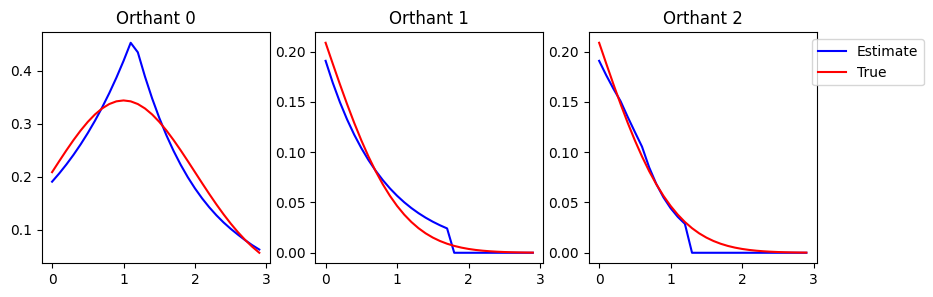

In [45]:
# plot of estimated density and true density
fig, axes = plt.subplots(1,3,figsize=(10,3))
xx = np.arange(0,3,0.1)
axes[0].plot(xx, np.vectorize(lcmle.pdf)(xx,0), c = "blue")
axes[0].plot(xx, np.vectorize(true_density.pdf)(xx,0), c = "red")
axes[0].set_title("Orthant 0")
axes[1].plot(xx, np.vectorize(lcmle.pdf)(xx,1), c = "blue")
axes[1].plot(xx, np.vectorize(true_density.pdf)(xx,1), c = "red", label = "True")
axes[1].set_title("Orthant 1")
axes[2].plot(xx, np.vectorize(lcmle.pdf)(xx,2), c = "blue", label = "Estimate")
axes[2].plot(xx, np.vectorize(true_density.pdf)(xx,2), c = "red", label = "True")
axes[2].set_title("Orthant 2")
axes[2].legend(bbox_to_anchor=(1.5, 1))

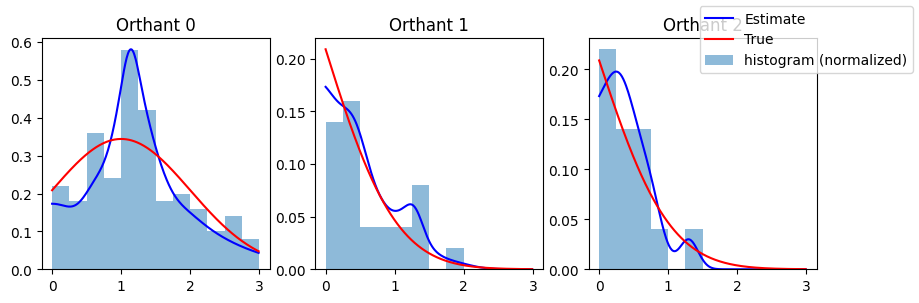

In [48]:
# Kernel density estimator
kde = lcd.kernel_density_estimate_1dim(x, ort, 3)
bin_edges = [k for k in np.arange(0,3.1,1/4)]
fig, axes = plt.subplots(1,3,figsize=(10,3))
xx = np.arange(0,3,0.01)
axes[0].plot(xx, np.vectorize(kde.pdf)(xx,0), c = "blue")
axes[0].plot(xx, np.vectorize(true_density.pdf)(xx,0), c = "red")
axes[0].hist(x[ort==0], bins = bin_edges, weights = [ 4/len(x)  for  _ in range(len(x[ort==0])) ] , alpha=0.5)
axes[0].set_title("Orthant 0")
axes[1].plot(xx, np.vectorize(kde.pdf)(xx,1), c = "blue")
axes[1].plot(xx, np.vectorize(true_density.pdf)(xx,1), c = "red")
axes[1].hist(x[ort==1], bins = bin_edges, weights = [ 4/len(x)  for  _ in range(len(x[ort==1])) ] , alpha=0.5)
axes[1].set_title("Orthant 1")
axes[2].plot(xx, np.vectorize(kde.pdf)(xx,2), c = "blue", label = "Estimate")
axes[2].plot(xx, np.vectorize(true_density.pdf)(xx,2), c = "red", label = "True")
axes[2].hist(x[ort==2], bins = bin_edges, weights = [ 4/len(x)  for  _ in range(len(x[ort==2])) ] , alpha=0.5, label="histogram (normalized)")
axes[2].set_title("Orthant 2")
#axes[2].legend(bbox_to_anchor=(1.5, 1))
fig.legend()

In [47]:
# calculation of integrted squared error
lcmle_ise, lcmle_err = lcd.ise_1dim(true_density, lcmle, epsabs = 1e-5)
kde_ise, kde_err = lcd.ise_1dim(true_density, kde, epsabs = 1e-5)
lcmle_ise, kde_ise

(0.004886157260669038, 0.024940447816269546)